#Description of the project

Informations about the dataset: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

#Importing Libraries

In [ ]:
#Basic Libraries
import pandas as pd
import numpy as np
#Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import folium
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

#Scickit Learn and machine learning features
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import decomposition
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import svm
from sklearn.svm import SVC
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

# Hide Warning Messages
import warnings
warnings.filterwarnings('ignore')


# Layout and Overlay

In [ ]:
plt.style.use('default')
sns.set(style="whitegrid",rc={'figure.figsize':(25, 10)})

# Importing Data

In [ ]:
full_table_Brute = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv', sep = ';', header=None)

In [ ]:
full_table_Brute.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


#Pre-Processing

Naming columns:


In [ ]:
full_table_non_triee=full_table_Brute

In [ ]:
columns_name=["SpMax_L",
              "J_Dz(e)",
              "nHM",
              "F01[N-N]",
              "F04[C-N]",
              "NssssC",
              "nCb-",
              "C%",
              "nCp",
              "nO",
              "F03[C-N]",
              "SdssC",
              "HyWi_B(m)",
              "LOC",
              "SM6_L",
              "F03[C-O]",
              "Me",
              "Mi",
              "nN-N",
              "nArNO2",
              "nCRX3",
              "SpPosA_B(p)",
              "nCIR",
              "B01[C-Br]",
              "B03[C-Cl]",
              "N-073",
              "SpMax_A",
              "Psi_i_1d",
              "B04[C-Br]",
              "SdO",
              "TI2_L",
              "nCrt",
              "C-026",
              "F02[C-N]",
              "nHDon",
              "SpMax_B(m)",
              "Psi_i_A",
              "nN",
              "SM6_B(m)",
              "nArCOOR",
              "nX",
              "experimental class"]
full_table_non_triee.columns=columns_name

In [ ]:
full_table_non_triee.head(20)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,9.657,0,1.092,1.153,0,0,0,1.125,0,0,0,0,2.000,0.446,0,18.375,0.800,0,0,0,1,4.712,4.583,0,9.303,0,0,RB
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,9.786,5,0.980,1.142,0,0,0,1.179,0,0,0,0,2.119,-0.002,0,11.115,3.889,0,0,0,0,3.379,2.143,0,7.950,0,0,RB
8,4.596,3.0777,0,0,0,0,2,44.4,2,0,0,0.000,2.970,0.875,9.540,0,0.968,1.115,0,0,0,1.328,1,0,0,0,2.175,0.041,0,0.000,1.069,0,0,0,0,3.626,1.917,0,7.939,0,0,RB
9,5.040,3.6112,0,0,1,0,2,41.2,0,4,3,-1.290,3.483,1.258,10.159,8,1.069,1.127,0,1,0,1.199,1,0,0,0,2.323,0.005,0,30.959,1.711,0,1,2,1,3.888,3.500,1,8.706,0,0,RB


In [ ]:
full_table_non_triee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [ ]:
full_table_non_triee.shape

(1055, 42)

Checking of the types of the columns:

In [ ]:
full_table_non_triee.dtypes

SpMax_L               float64
J_Dz(e)               float64
nHM                     int64
F01[N-N]                int64
F04[C-N]                int64
NssssC                  int64
nCb-                    int64
C%                    float64
nCp                     int64
nO                      int64
F03[C-N]                int64
SdssC                 float64
HyWi_B(m)             float64
LOC                   float64
SM6_L                 float64
F03[C-O]                int64
Me                    float64
Mi                    float64
nN-N                    int64
nArNO2                  int64
nCRX3                   int64
SpPosA_B(p)           float64
nCIR                    int64
B01[C-Br]               int64
B03[C-Cl]               int64
N-073                   int64
SpMax_A               float64
Psi_i_1d              float64
B04[C-Br]               int64
SdO                   float64
TI2_L                 float64
nCrt                    int64
C-026                   int64
F02[C-N]  

Checking if any value is Null or NaN:

In [ ]:
full_table_non_triee.isnull().sum()

SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                    0
experimental cla

DataFrame Preprocessed:

In [ ]:
df = full_table_non_triee

In [ ]:
label_liste = {'RB':1,'NRB':0}
df['experimental class'] = df['experimental class'].map(label_liste)
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [ ]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


#Data-Visualization

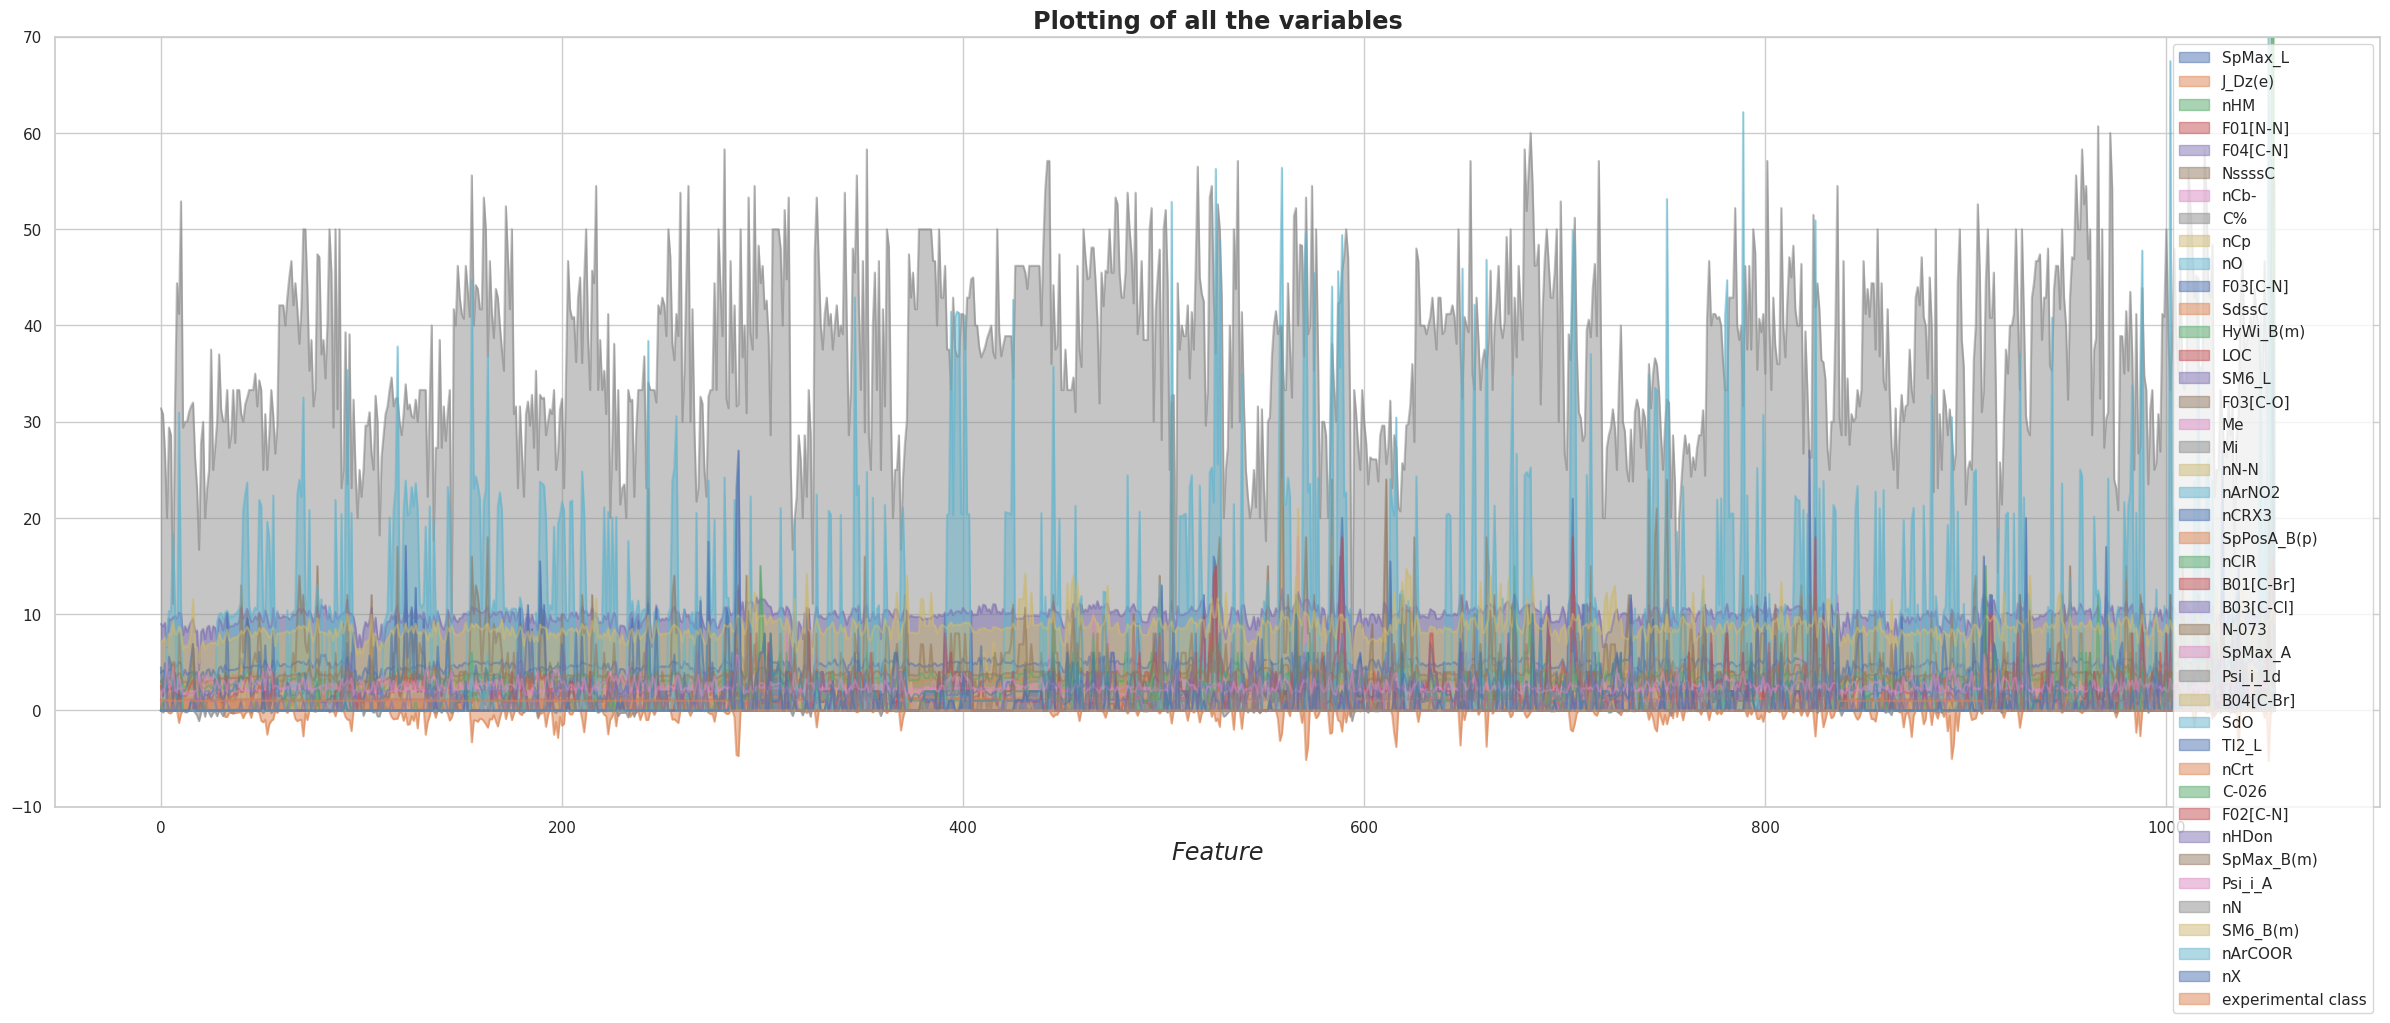

In [ ]:
df.iloc[:,:].plot(kind = 'area', stacked = False, figsize = (30,10))
plt.title("Plotting of all the variables", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Feature", fontsize='x-large', fontstyle = "italic")
plt.ylim(-10,70)
plt.show()

This plot does not allow to visualize much, this is why we need to find the most important variables to make more sensible observations.

In [ ]:
#Principal Component Analysis:
pca = PCA(n_components=2)
pcaData = pca.fit(df.loc[:, df.columns != 'experimental class'])

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Singular Values: {pca.singular_values_}')

Explained variance ratio: [0.4819634  0.27481138]
Singular Values: [406.58093423 307.01340388]


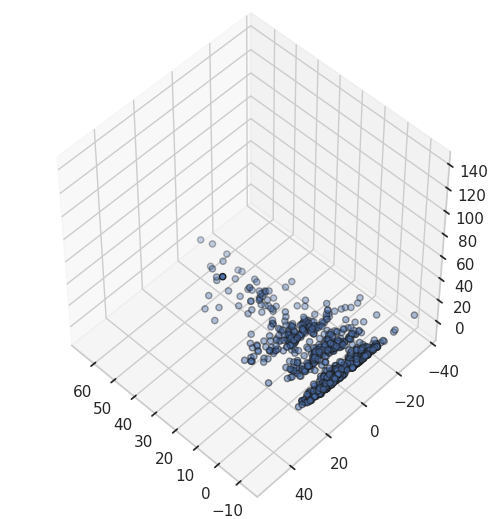

In [ ]:
fig = plt.figure(1, figsize=(5,5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components =3)
pca.fit(df.loc[:, df.columns != 'experimental class'])
X = pca.transform(df.loc[:, df.columns != 'experimental class'])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.nipy_spectral, edgecolor="k")
plt.show()

In [ ]:
#Calculation of the importance of variables in order to plot the most important for the rest of the study
#Separation of the target and the rest of the data
x = df.drop('experimental class', axis=1)
y = df['experimental class']
#Training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y)
# Define the model
model = LogisticRegression()
# Fit the model
model.fit(x_train, y_train)
# Get importance
importance = model.coef_[0]
# Summarize feature importance/contribution
importancedf = pd.DataFrame(importance)
importancedf.columns = ['Importance']
importancedf = abs(importancedf)
importancedf = importancedf.sort_values(by = 'Importance', ascending = False).style.background_gradient(cmap='Greens').set_caption('Molecular Descriptors sorted by contribution to the model')
importancedf

,Importance
5,1.640916
31,1.626058
36,1.309404
39,1.263768
6,0.984404
1,0.861521
19,0.776102
2,0.728480
37,0.703778
12,0.657749


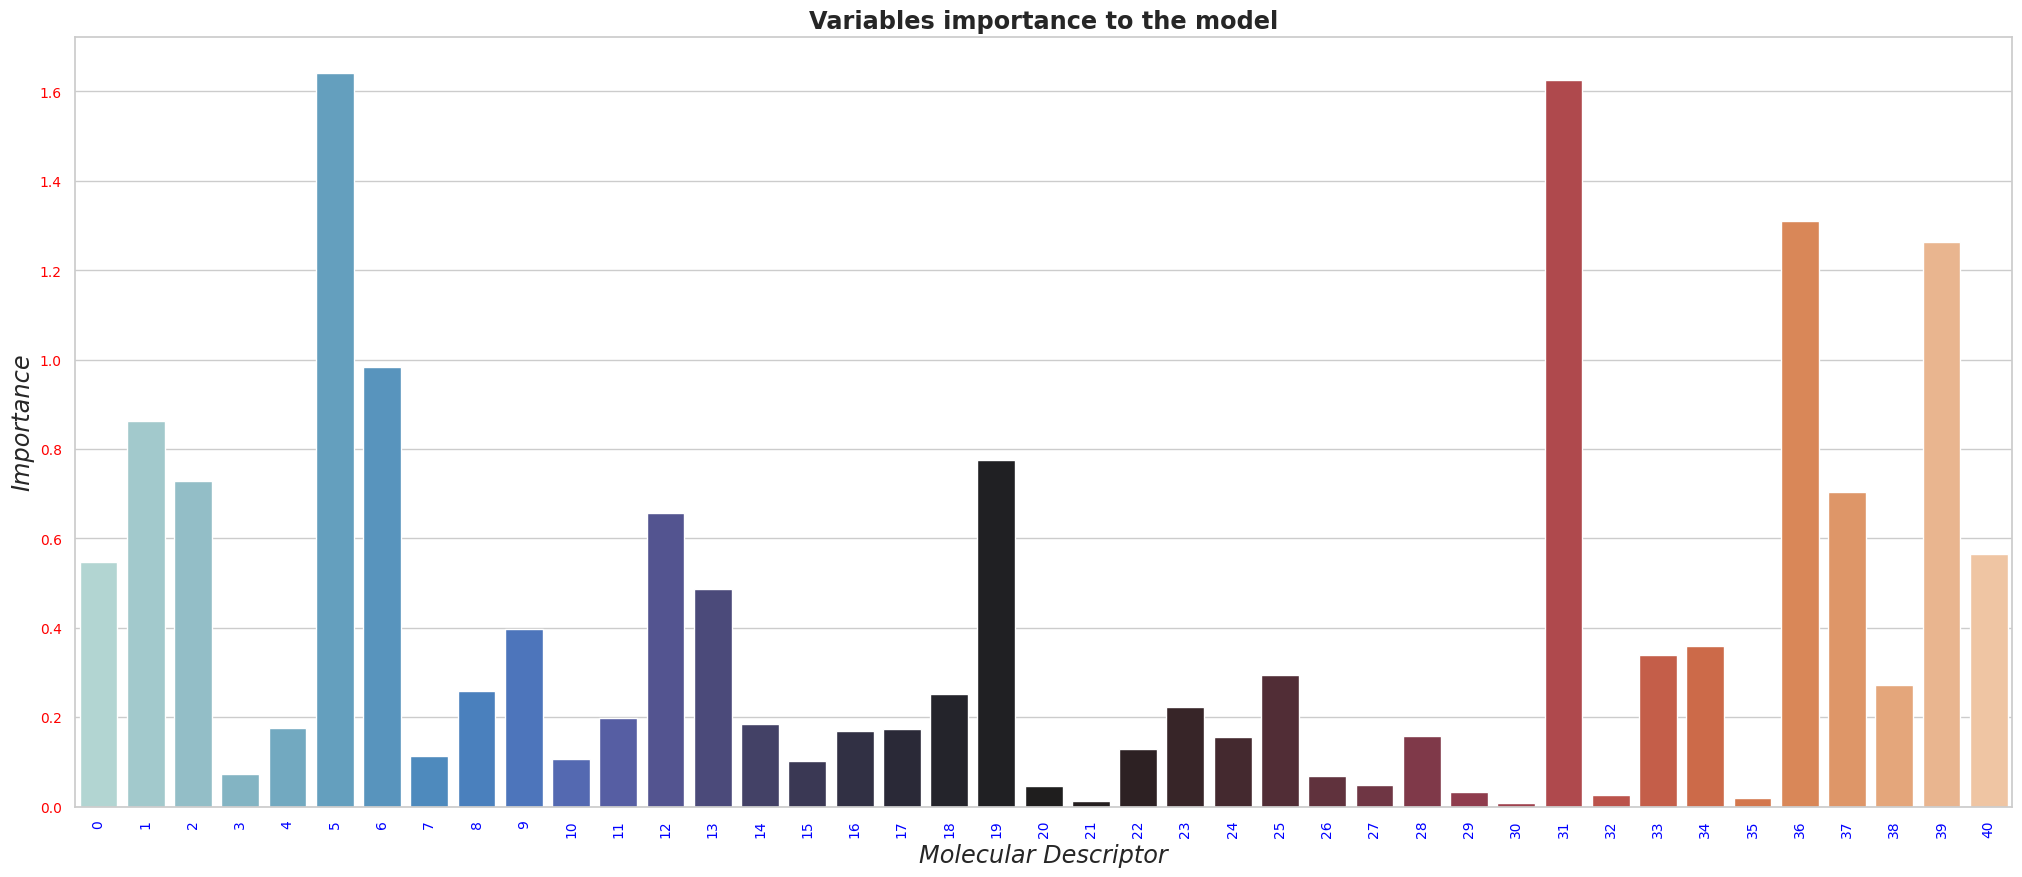

In [ ]:
# Plot features importance
values = [x for x in range(len(importance))]
axis = sns.barplot(values,abs(importance),palette = 'icefire')
plt.title("Variables importance to the model", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Molecular Descriptor", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Importance", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.show()

The most important variables to the model are the 6th (NssssC: Number of atoms of type ssssC), the 37th (Psi_i_A: Intrinsic state pseudoconnectivity index - type S average), the 32th (nCrt: Number of ring tertiary C(sp3)), the 20th (nArNO2: Number of nitro groups (aromatic)), the 40th (nArCOOR: Number of esters (aromatic)) and the 7th (nCb-: Number of substituted benzene C(sp2)). Values can vary because we split into training and test set but these ones are always on the top of the ranking. The index starting at 0, it normal that the number 5 corresponds to the 6th value etc.

In [ ]:
myData = df.pivot_table(index=['experimental class'],columns = ['NssssC'],values = ['nCrt'],aggfunc='sum', fill_value = 0)
myData.head()

nCrt                                       
NssssC               0   1   2   3  4  5  6  7  8  9  11 12 13
experimental class                                            
0                    58  15  11  30  1  0  8  0  2  0  0  0  0
1                     6   4   2   0  0  0  0  0  0  0  0  0  0

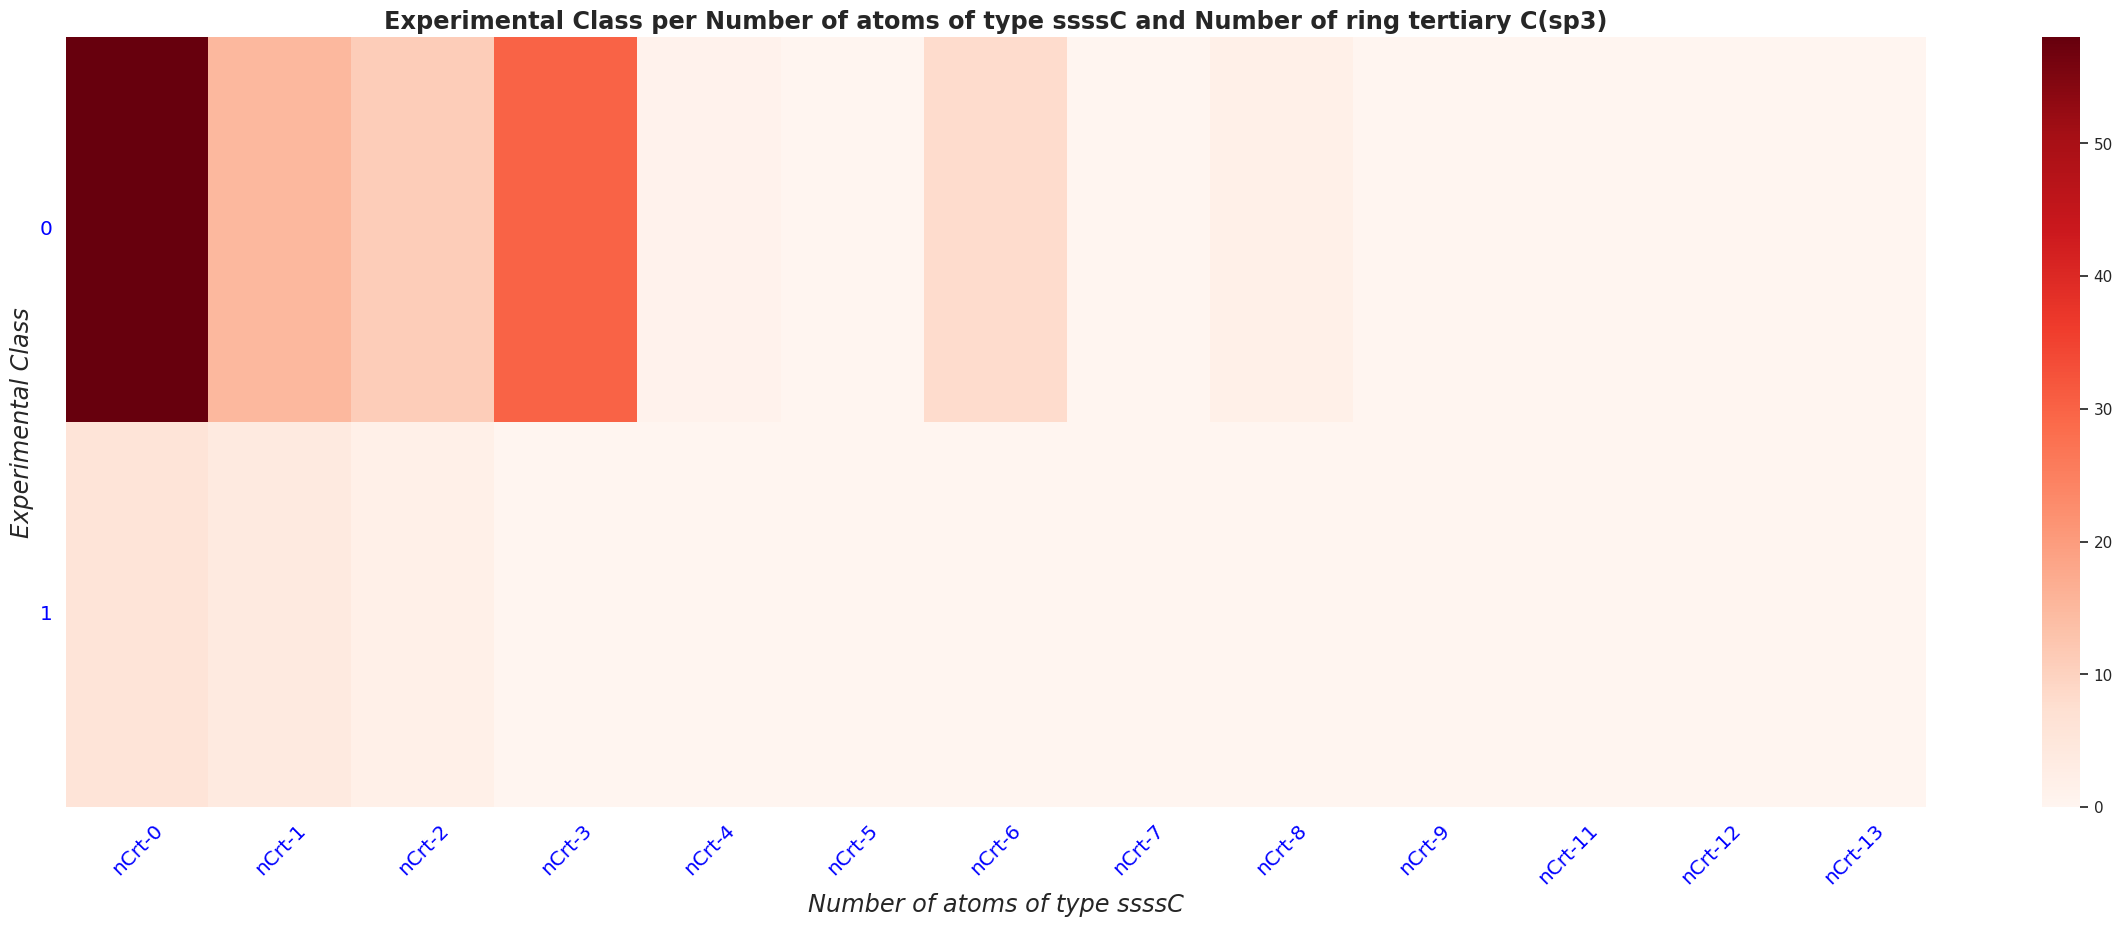

In [ ]:
plt.figure(figsize = (30,10))
axis = sns.heatmap(myData, cmap = 'Reds')

#Set title, xlabel and ylabel with custom parameters of size etc...
axis.set_title("Experimental Class per Number of atoms of type ssssC and Number of ring tertiary C(sp3)", fontsize='x-large', fontweight = 'bold')
axis.set_xlabel("Number of atoms of type ssssC", fontsize='x-large', fontstyle = "italic")
axis.set_ylabel("Experimental Class", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 45, "color":"blue", "fontsize":"large"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"blue", "fontsize":"large"}
plt.setp(axis.get_yticklabels(), **properties2)

plt.show()

An interesting thing is to note that when the Number of ring tertiary C(sp3) is around 0 and the Number of atoms of type ssssC is very Low too, the Experimental class is always non-biodegradable ready. We can't conclude for other values of nCrt-1 and NssssC.

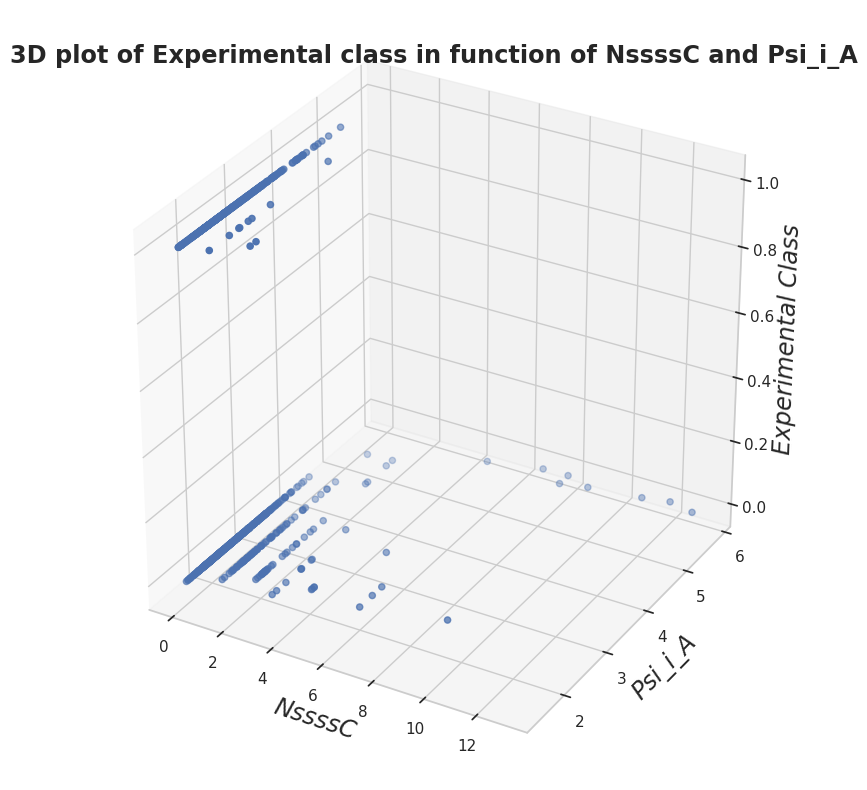

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['NssssC'], df['Psi_i_A'], df['experimental class'])
ax.set_xlabel('NssssC', fontsize='x-large', fontstyle = "italic")
ax.set_ylabel('Psi_i_A', fontsize='x-large', fontstyle = "italic")
ax.set_zlabel('Experimental Class', fontsize='x-large', fontstyle = "italic")
ax.set_title('3D plot of Experimental class in function of NssssC and Psi_i_A', fontsize='x-large', fontweight = 'bold')
plt.show()

We can observe that when the Number of atoms of type ssssC is above 0, the experimental class is non-ready biodegradable in most cases.

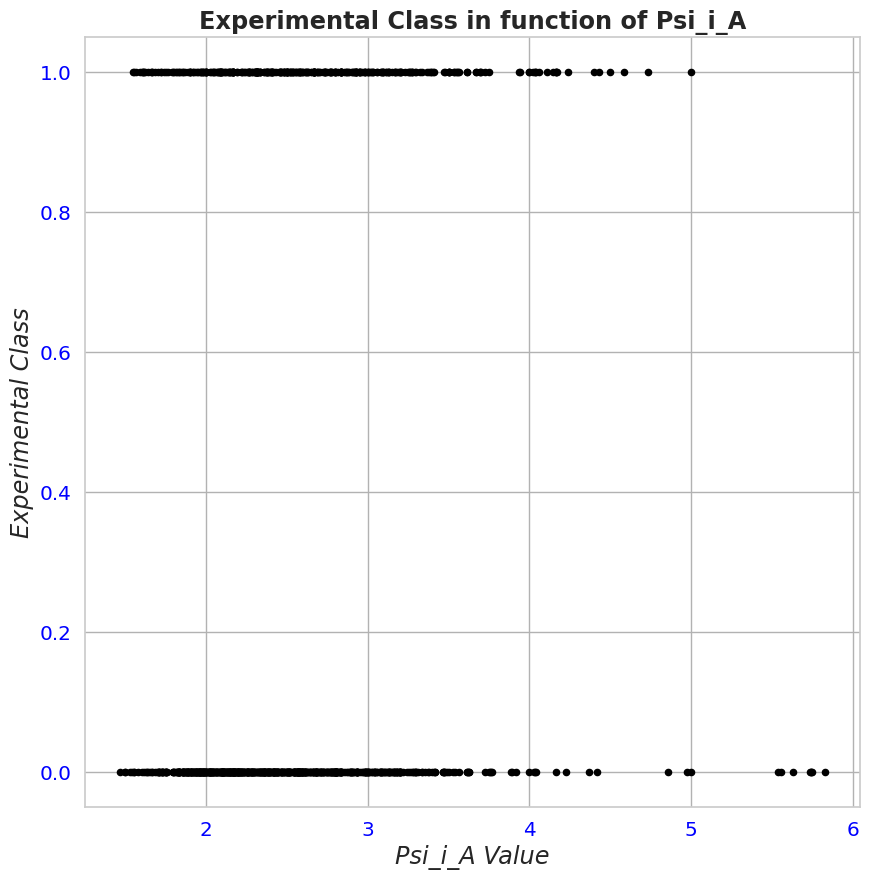

In [ ]:
sns.set_theme(style={'axes.facecolor': 'white','grid.color': '#B2B2B2'},rc={'figure.figsize':(20, 10)})
df[['Psi_i_A','experimental class']].plot.scatter('Psi_i_A','experimental class', figsize = (10,10), color = 'black')
plt.title("Experimental Class in function of Psi_i_A", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Psi_i_A Value", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Experimental Class", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

At first sight, we cannot conclude about the ready biodegradability of a chemical with only looking at the Intrinsic state pseudoconnectivity index - type S average.

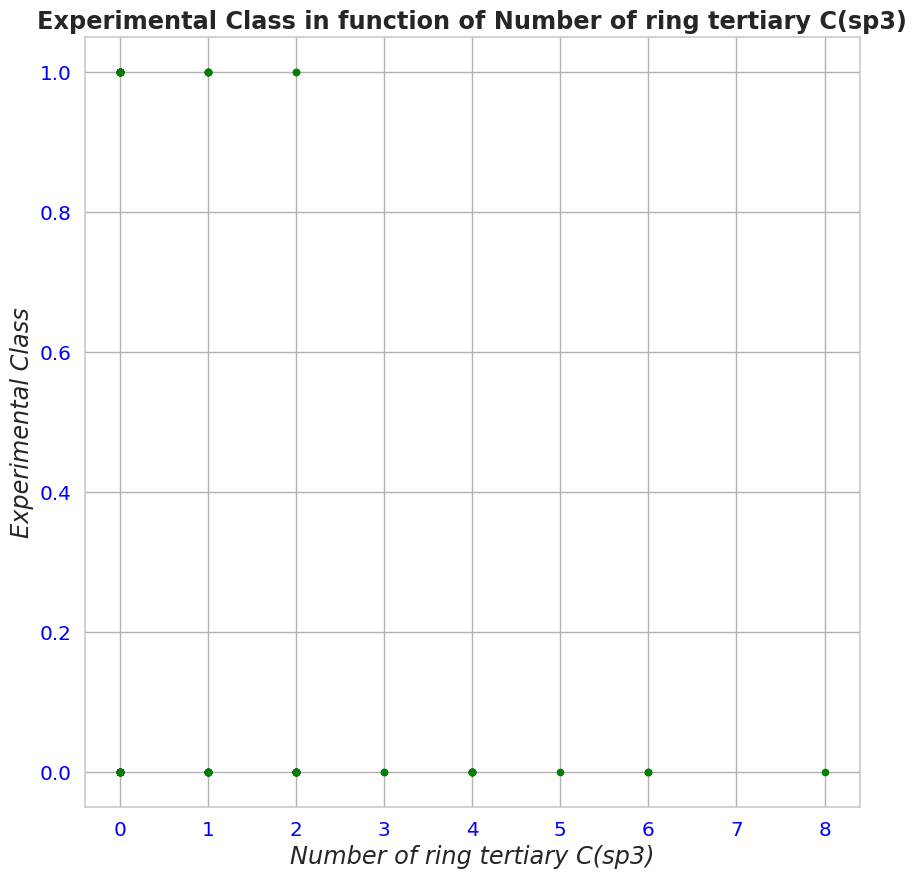

In [ ]:
sns.set_theme(style={'axes.facecolor': 'white','grid.color': '#B2B2B2'},rc={'figure.figsize':(20, 10)})
df[['nCrt','experimental class']].plot.scatter('nCrt','experimental class', figsize = (10,10), color = 'green')
plt.title("Experimental Class in function of Number of ring tertiary C(sp3)", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Number of ring tertiary C(sp3)", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Experimental Class", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

We can see that when the Number of ring tertiary C(sp3) is above 2, the experimental class is always non-ready biodegradable. We can conclude that the Number of Number of N hydrazines must be 2 or below to have a ready biodegradable chemical.

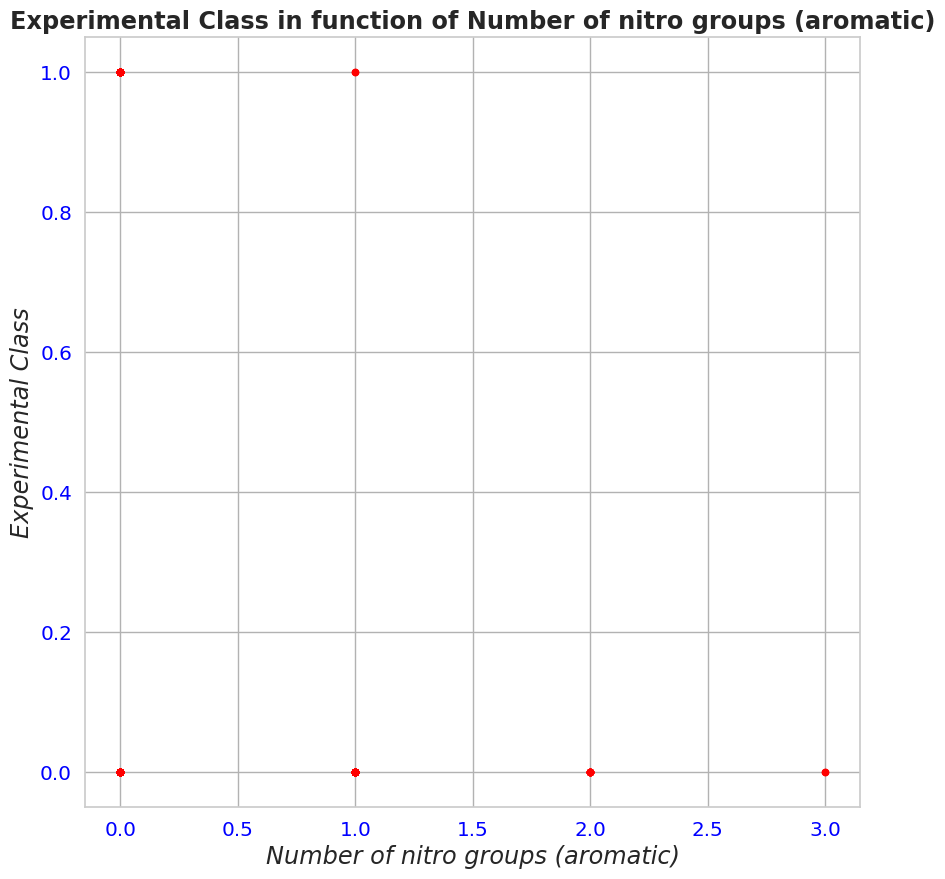

In [ ]:
sns.set_theme(style={'axes.facecolor': 'white','grid.color': '#B2B2B2'},rc={'figure.figsize':(20, 10)})
df[['nArNO2','experimental class']].plot.scatter('nArNO2','experimental class', figsize = (10,10), color = 'red')
plt.title("Experimental Class in function of Number of nitro groups (aromatic)", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Number of nitro groups (aromatic)", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Experimental Class", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

We can see that when the Number of nitro groups (aromatic) is above 1, the experimental class is always non-ready biodegradable.

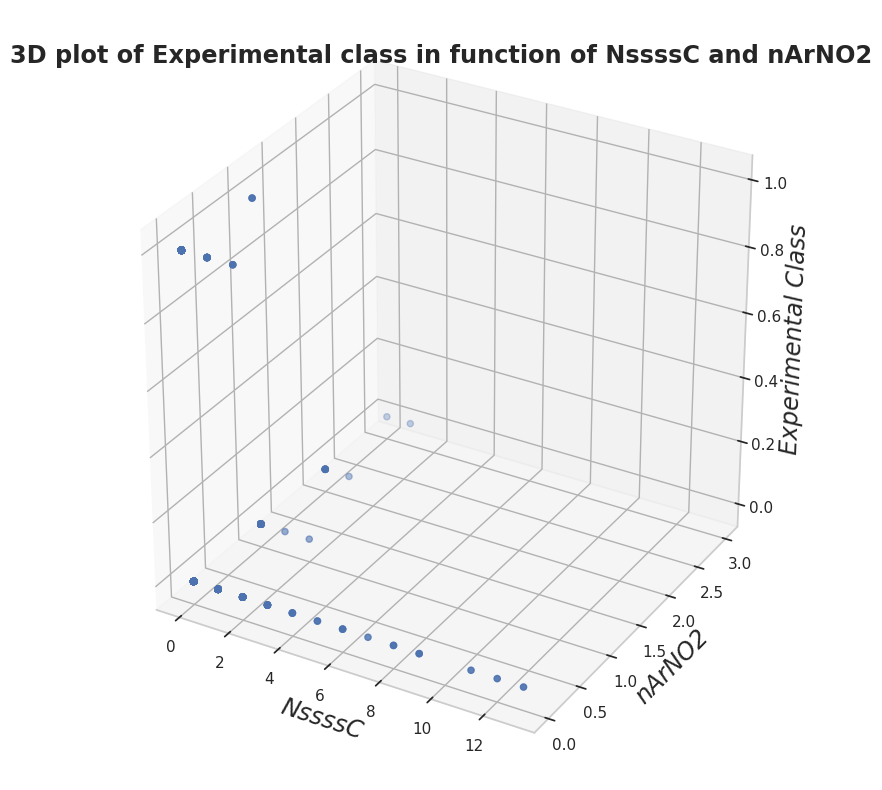

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['NssssC'], df['nArNO2'], df['experimental class'])
ax.set_xlabel('NssssC', fontsize='x-large', fontstyle = "italic")
ax.set_ylabel('nArNO2', fontsize='x-large', fontstyle = "italic")
ax.set_zlabel('Experimental Class', fontsize='x-large', fontstyle = "italic")
ax.set_title('3D plot of Experimental class in function of NssssC and nArNO2', fontsize='x-large', fontweight = 'bold')
plt.show()

After some analysis, we could plot this 3Dplot and clearly see that when the Number of atoms of type ssssC and Number of nitro groups (aromatic) are High, the chemical is non-ready biodegradable.

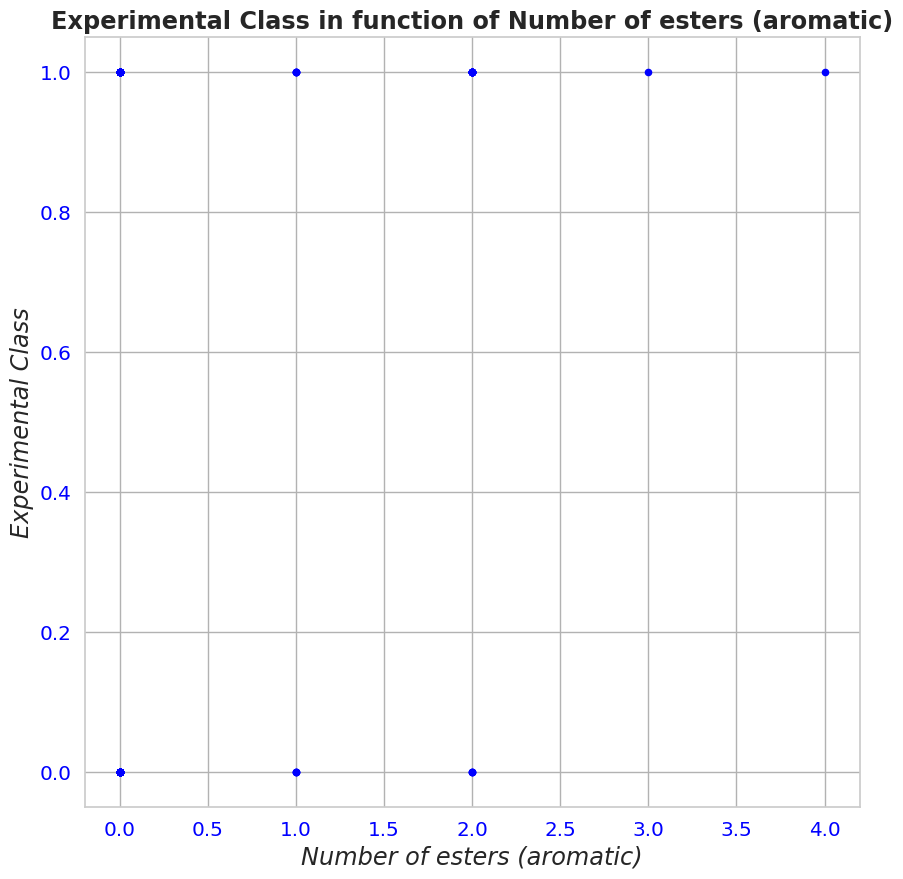

In [ ]:
sns.set_theme(style={'axes.facecolor': 'white','grid.color': '#B2B2B2'},rc={'figure.figsize':(20, 10)})
df[['nArCOOR','experimental class']].plot.scatter('nArCOOR','experimental class', figsize = (10,10), color = 'blue')
plt.title("Experimental Class in function of Number of esters (aromatic)", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Number of esters (aromatic)", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Experimental Class", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

In this plot, we can see that when the Number of esters (aromatic) is above 2, the chemicals are always ready-biodegradable.

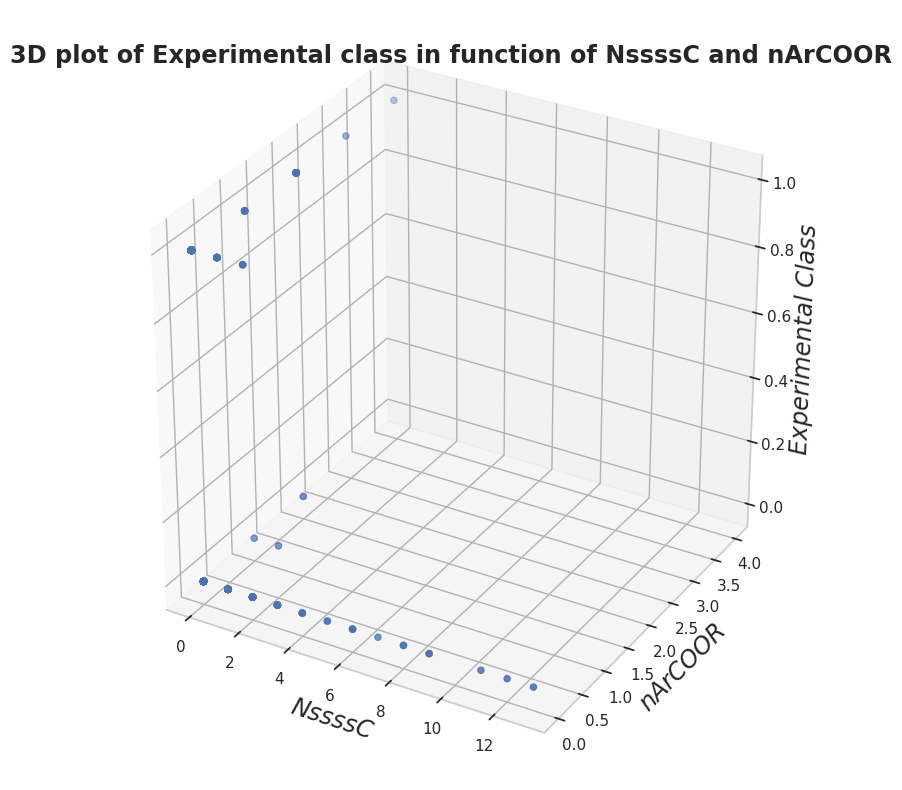

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['NssssC'], df['nArCOOR'], df['experimental class'])
ax.set_xlabel('NssssC', fontsize='x-large', fontstyle = "italic")
ax.set_ylabel('nArCOOR', fontsize='x-large', fontstyle = "italic")
ax.set_zlabel('Experimental Class', fontsize='x-large', fontstyle = "italic")
ax.set_title('3D plot of Experimental class in function of NssssC and nArCOOR', fontsize='x-large', fontweight = 'bold')
plt.show()

We can add by this plot that in almost all cases, the chemical is ready-biodegradable when the Number of esters (aromatic) is above 1 and the Number of atoms of type ssssC is zero.

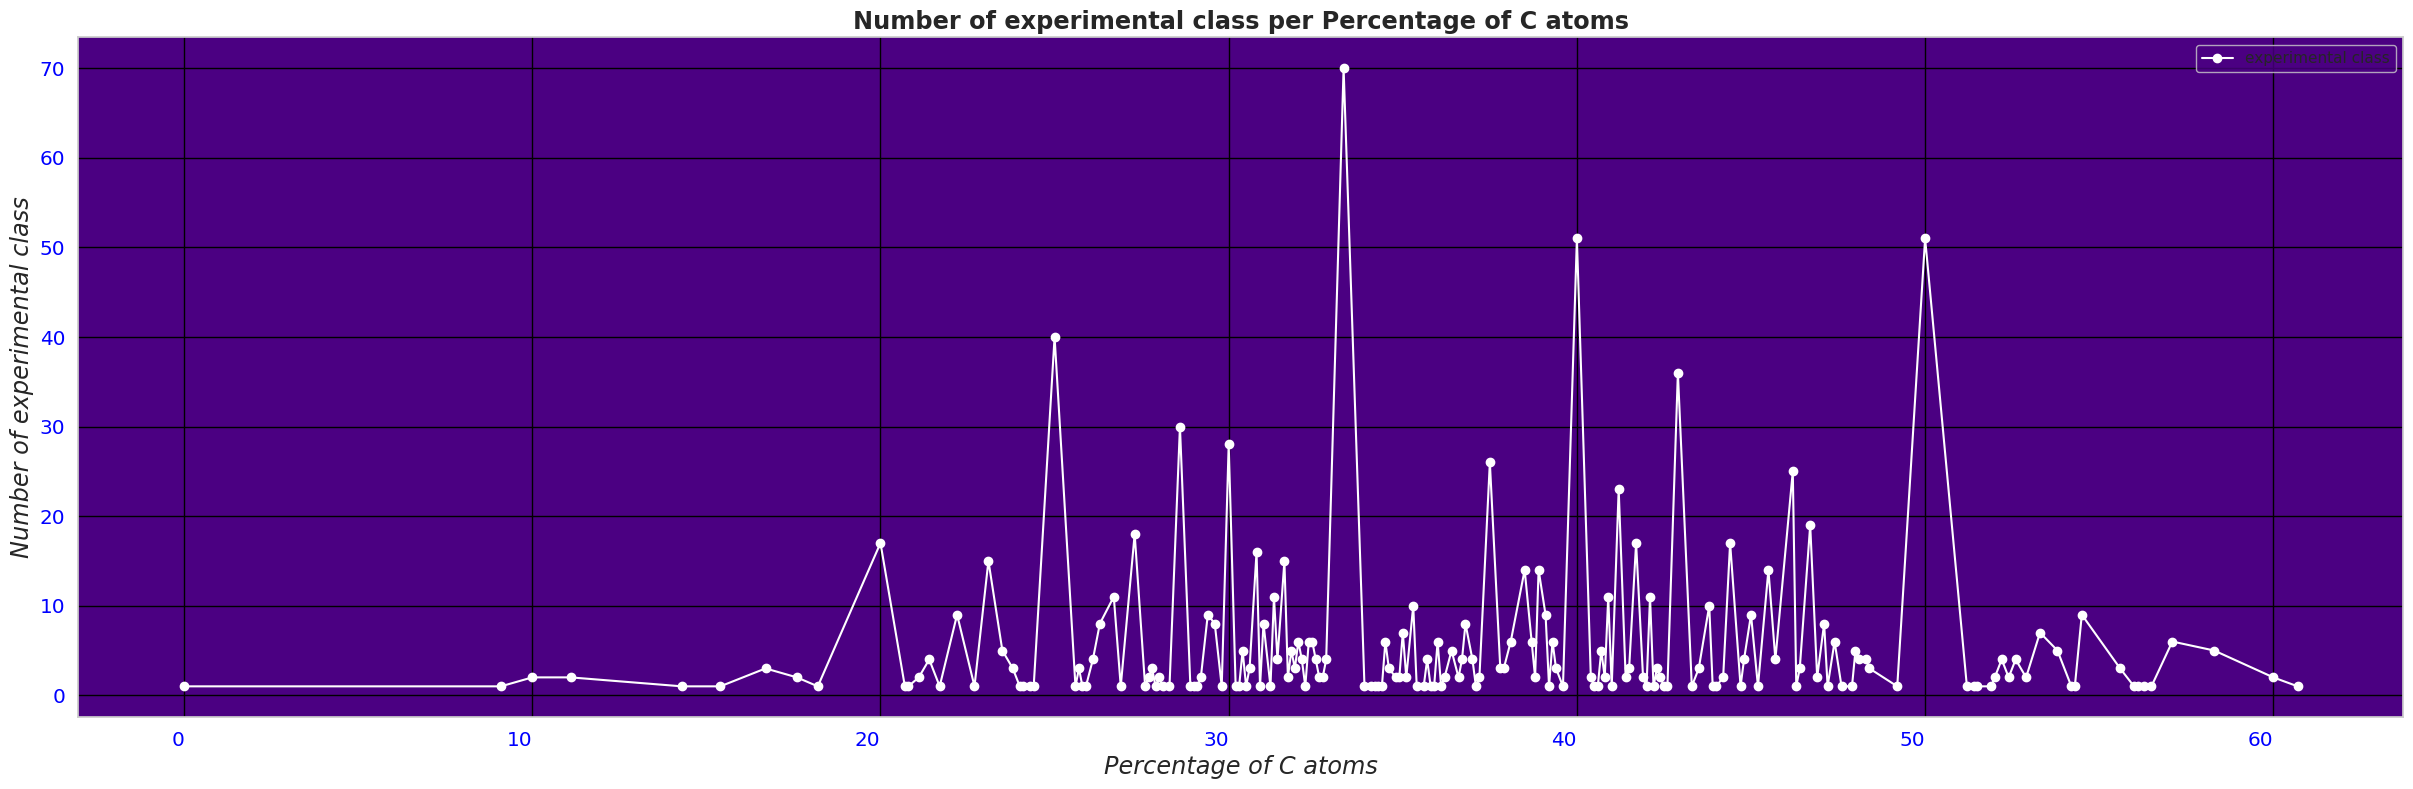

In [ ]:
sns.set_theme(style={'axes.facecolor': 'indigo','grid.color': 'black'},rc={'figure.figsize':(20, 10)})
df1 = df[['experimental class','C%']].groupby('C%').count()
df1.plot(marker='o', color = 'white', linestyle='-', figsize=(30, 10), subplots=True)
plt.title("Number of experimental class per Percentage of C atoms", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Percentage of C atoms", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Number of experimental class", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

We can see some spikes of numbers of experimental class around 33%, 25% and 50% of percentage of C atoms. It shows that most of the chemicals contain between 25 and 50% of C atoms.

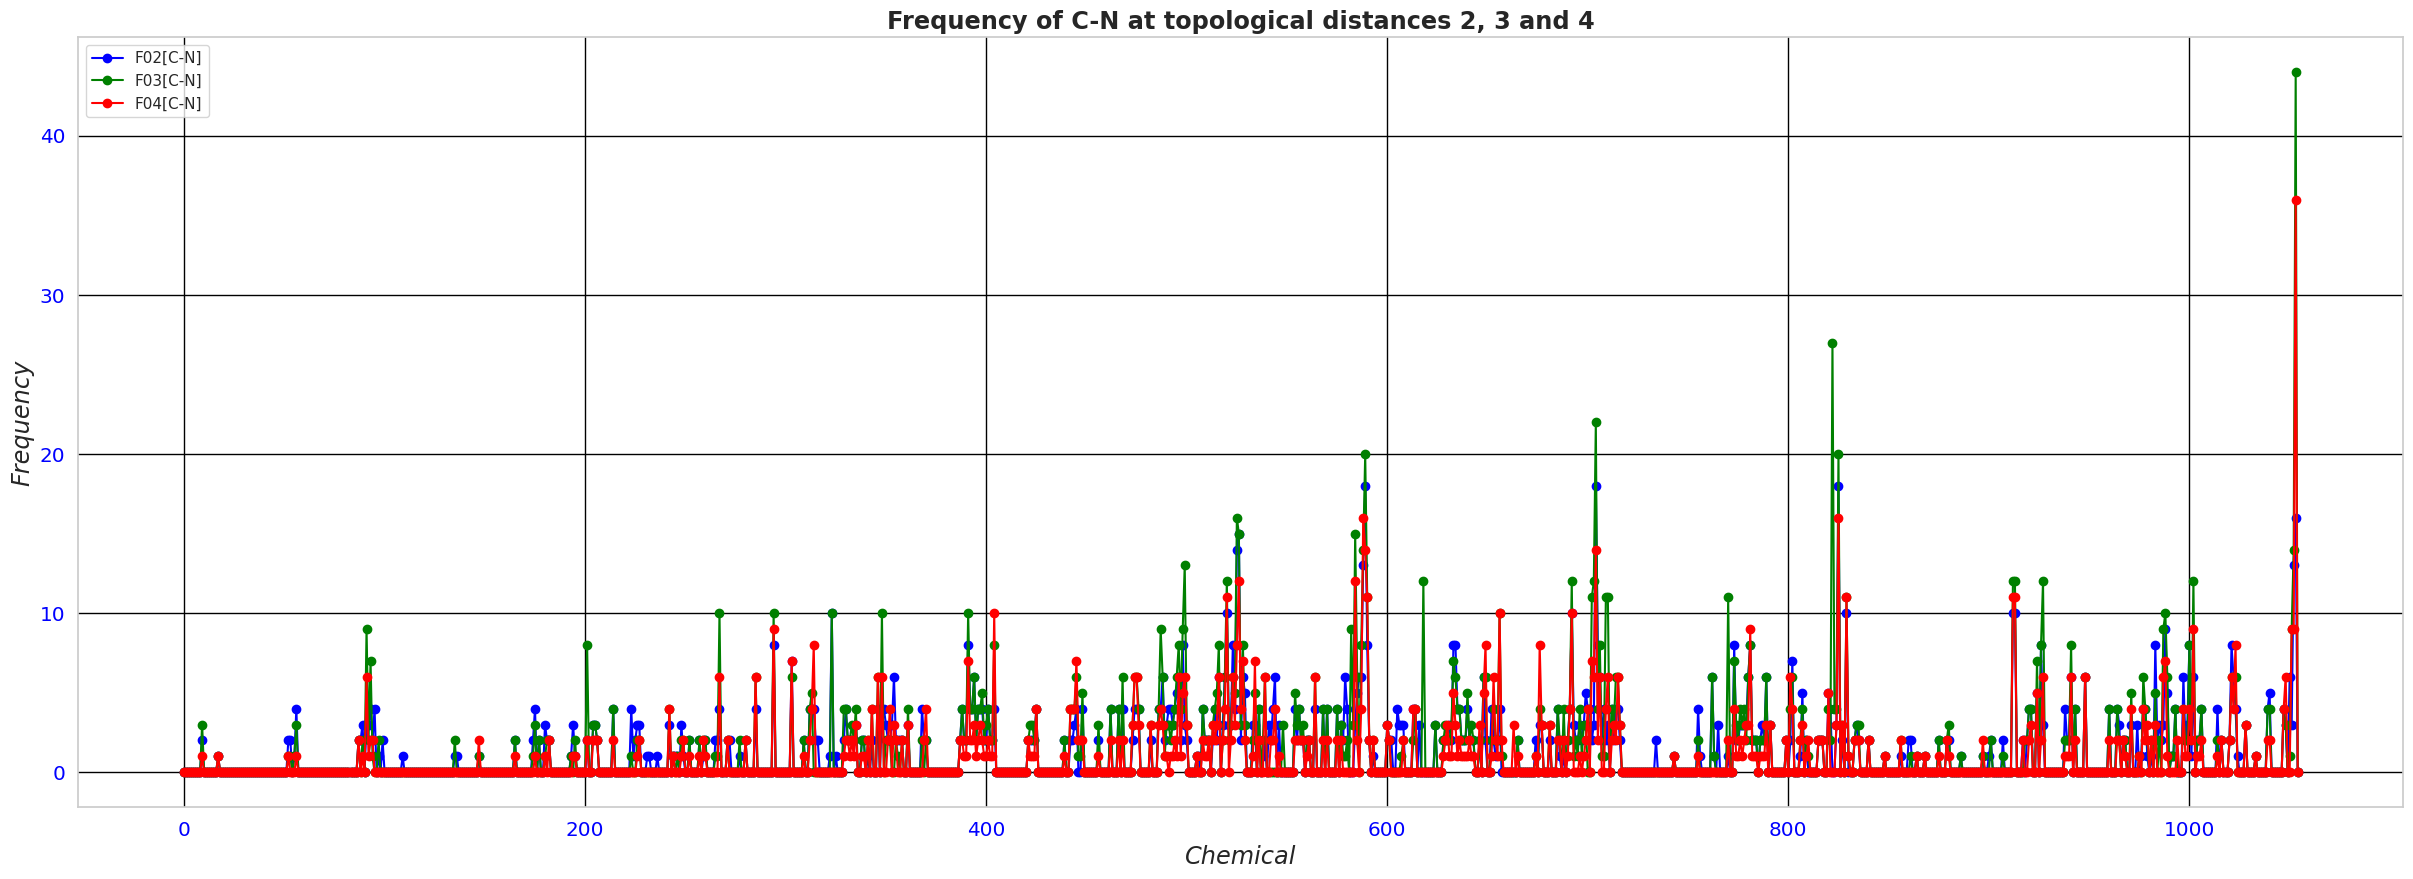

In [ ]:
sns.set_theme(style={'axes.facecolor': 'white','grid.color': 'black'},rc={'figure.figsize':(20, 10)})
df[['F02[C-N]','F03[C-N]','F04[C-N]']].plot(marker='o', color = ['blue','green','red'], linestyle='-', figsize=(30, 10))
plt.title('Frequency of C-N at topological distances 2, 3 and 4', fontsize='x-large', fontweight = 'bold')
plt.xlabel("Chemical", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Frequency", fontsize='x-large', fontstyle = "italic")
plt.xticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.yticks(**{"rotation" : 0, "color":"blue", "fontsize":"large"})
plt.show()

We can see that when the frequency of C-N at a specific topological distance is high, the frequency of C-N at the other topological distances is high too for a chemical and when that frequency is low for a distance, it is low for all distances.

In [ ]:
df3 = pd.DataFrame(df.groupby('experimental class')['experimental class'].count())
df3.columns=["Count"]
df3

,Count
experimental class,
0,699
1,356


This statistics shows that chemicals in the dataset are mostly non-ready biodegradable (in 66% of cases), so this statistics can be generalized to all the chemicals and our future predictions might be in majority non-ready biodegradable.

As a conclusion, we don't have some precise observations when looking at one or two values at the same time. We need to take in account several variables at the same time to predict the ready biodegradability of a chemical.

#Modeling / Machine Learning

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv', sep = ';', header=None)
label_liste = {'RB':1,'NRB':0}
df[41] = df[41].map(label_liste)

In [ ]:
col_quanti =[(i) for i in range(41)]

(Remove commentary to scale values)


In [ ]:
transfo_quanti = Pipeline(steps=[
    ('imputation', SimpleImputer(missing_values=np.nan,strategy='median'))#,
    #('standard', StandardScaler())
    ])


preparation = ColumnTransformer(
    transformers=[
        ('quanti', transfo_quanti , col_quanti)])

We separate the target from the rest of the data:

In [ ]:
x = df.drop(41, axis=1)
y = df[41]

We build the training and validation samples:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
tabResult_classification= []
tabResult_classification_CV= []
def modelbest():
  modele_ml = Pipeline(steps=[('preparation', preparation),
                      ('logit', LogisticRegression(solver='lbfgs'))])
  modele_ml.fit(x_train, y_train)
  y_pred=modele_ml.predict(x_test)
  res=accuracy_score(y_test,y_pred)
  tabResult_classification.append(["LogisticRegression",res])
  res_modele_ml=cross_val_score(modele_ml,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["LogisticRegression",res_modele_ml])
  #===================================================
  modele_ml2 = Pipeline(steps=[('preparation', preparation),
                      ('logit', RandomForestClassifier())])
  modele_ml2.fit(x_train, y_train)
  y_pred2=modele_ml2.predict(x_test)
  res2=accuracy_score(y_test,y_pred2)
  tabResult_classification.append(["RandomForestClassifier",res2])
  res_modele_ml2=cross_val_score(modele_ml2,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["RandomForestClassifier",res_modele_ml2])
  #===================================================
  modele_ml3 = Pipeline(steps=[('preparation', preparation),
                      ('logit', XGBClassifier())])
  modele_ml3.fit(x_train, y_train)
  y_pred3=modele_ml3.predict(x_test)
  res3=accuracy_score(y_test,y_pred3)
  tabResult_classification.append(["XGBClassifier",res3])
  res_modele_ml3=cross_val_score(modele_ml3,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["XGBClassifier",res_modele_ml3])
  #===================================================
  modele_ml4 = Pipeline(steps=[('preparation', preparation),
                      ('logit', AdaBoostClassifier())])
  modele_ml4.fit(x_train, y_train)
  y_pred4=modele_ml4.predict(x_test)
  res4=accuracy_score(y_test,y_pred4)  
  tabResult_classification.append(["AdaBoostClassifier",res4])
  res_modele_ml4=cross_val_score(modele_ml4,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["AdaBoostClassifier",res_modele_ml4])
  #===================================================
  modele_ml5 = Pipeline(steps=[('preparation', preparation),
                      ('logit', GradientBoostingClassifier())])
  modele_ml5.fit(x_train, y_train)
  y_pred5=modele_ml5.predict(x_test)
  res5=accuracy_score(y_test,y_pred5)  
  tabResult_classification.append(["GradientBoostingClassifier",res5])
  res_modele_ml5=cross_val_score(modele_ml5,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["GradientBoostingClassifier",res_modele_ml5])
  #===================================================
  modele_ml6 = Pipeline(steps=[('preparation', preparation),
                      ('logit', HistGradientBoostingClassifier())])
  modele_ml6.fit(x_train, y_train)
  y_pred6=modele_ml6.predict(x_test)
  res6=accuracy_score(y_test,y_pred6)  
  tabResult_classification.append(["HistGradientBoostingClassifier",res6]) 
  res_modele_ml6=cross_val_score(modele_ml6,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["HistGradientBoostingClassifier",res_modele_ml6])
  #===================================================
  modele_ml7 = Pipeline(steps=[('preparation', preparation),
                      ('logit', ExtraTreesClassifier())])
  modele_ml7.fit(x_train, y_train)
  y_pred7=modele_ml7.predict(x_test)
  res7=accuracy_score(y_test,y_pred7)
  tabResult_classification.append(["ExtraTreesClassifier",res7]) 
  res_modele_ml7=cross_val_score(modele_ml7,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["ExtraTreesClassifier",res_modele_ml7])  
  #===================================================
  modele_ml8 = Pipeline(steps=[('preparation', preparation),
                      ('logit', BaggingClassifier(base_estimator=SVC()))])
  modele_ml8.fit(x_train, y_train)
  y_pred8=modele_ml8.predict(x_test)
  res8=accuracy_score(y_test,y_pred8)
  tabResult_classification.append(["BaggingClassifier",res8])   
  res_modele_ml8=cross_val_score(modele_ml8,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["BaggingClassifier",res_modele_ml8])
  #===================================================
  modele_ml9 = Pipeline(steps=[('preparation', preparation),
                      ('logit', BernoulliNB())])
  modele_ml9.fit(x_train, y_train)
  y_pred9=modele_ml9.predict(x_test)
  res9=accuracy_score(y_test,y_pred9)
  tabResult_classification.append(["BernoulliNB",res9])  
  res_modele_ml9=cross_val_score(modele_ml9,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["BernoulliNB",res_modele_ml9])
  #===================================================
  modele_ml10 = Pipeline(steps=[('preparation', preparation),
                      ('logit', MLPClassifier())])
  modele_ml10.fit(x_train, y_train)
  y_pred10=modele_ml10.predict(x_test)
  res10=accuracy_score(y_test,y_pred10)
  tabResult_classification.append(["MLPClassifier",res10])
  res_modele_ml10=cross_val_score(modele_ml10,x_train, y_train,cv=5,scoring='accuracy').mean()
  tabResult_classification_CV.append(["MLPClassifier",res_modele_ml10])

In [ ]:
%%time
modelbest()

CPU times: user 23.3 s, sys: 6.54 s, total: 29.9 s
Wall time: 19.5 s


Putting the informations of the Accuracy in a DataFrame to make it more visual and see which is the best model:

In [ ]:
dfResult_classification = pd.DataFrame(tabResult_classification,columns=('Model','Accuracy'))
dfResult_classification = dfResult_classification.sort_values(by="Accuracy",ascending=False,ignore_index=True).style.background_gradient(cmap='Blues').set_caption('Summary of Models experimented and their Accuracy')
dfResult_classification

,Model,Accuracy
0,MLPClassifier,0.901515
1,LogisticRegression,0.878788
2,HistGradientBoostingClassifier,0.878788
3,GradientBoostingClassifier,0.875000
4,ExtraTreesClassifier,0.875000
5,RandomForestClassifier,0.867424
6,XGBClassifier,0.863636
7,AdaBoostClassifier,0.852273
8,BaggingClassifier,0.806818
9,BernoulliNB,0.795455


In [ ]:
dfResult_classification_CV = pd.DataFrame(tabResult_classification_CV,columns=('Model','Accuracy Cross Validation'))
dfResult_classification_CV = dfResult_classification_CV.sort_values(by="Accuracy Cross Validation",ascending=False,ignore_index=True).style.background_gradient(cmap='Blues').set_caption('Summary of Models experimented and their Accuracy with Cross validation')
dfResult_classification_CV

,Model,Accuracy Cross Validation
0,RandomForestClassifier,0.869811
1,ExtraTreesClassifier,0.868545
2,XGBClassifier,0.868498
3,GradientBoostingClassifier,0.864708
4,HistGradientBoostingClassifier,0.863458
5,LogisticRegression,0.857137
6,AdaBoostClassifier,0.853364
7,MLPClassifier,0.838174
8,BaggingClassifier,0.774946
9,BernoulliNB,0.769883


In [ ]:
dfResult_classification = dfResult_classification_CV.data

We plot the table above:

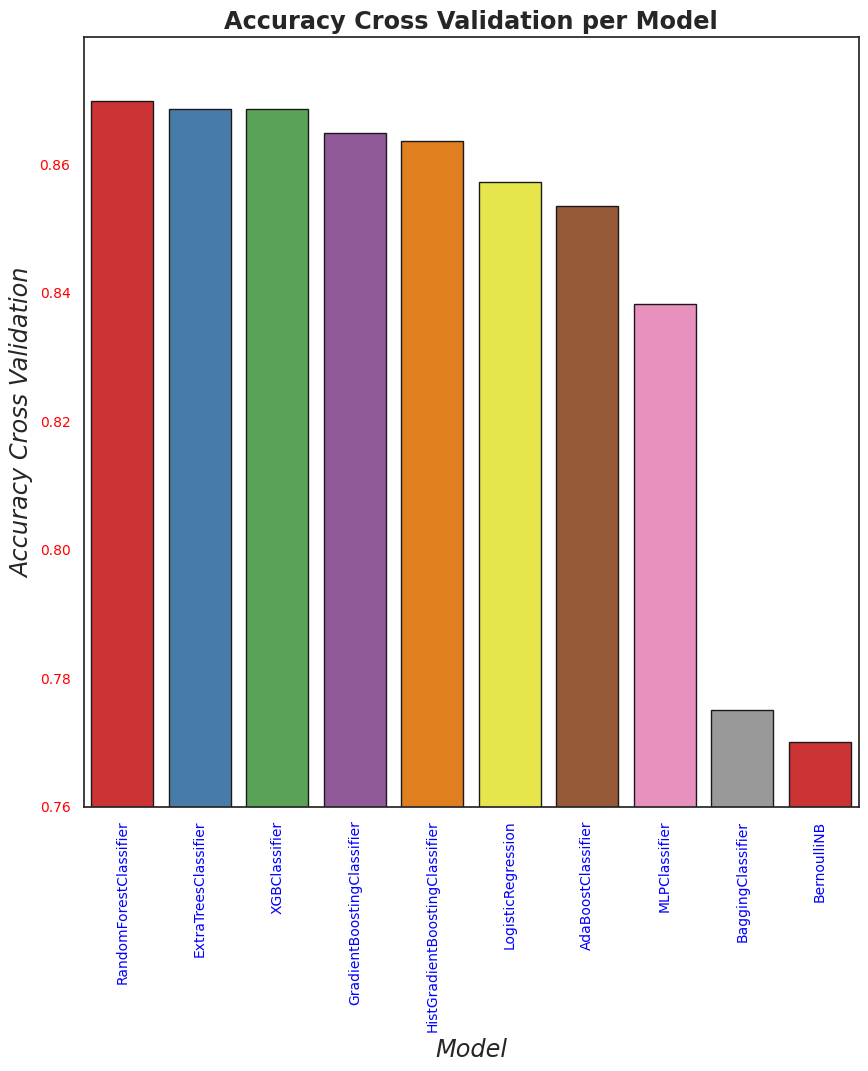

In [ ]:
sns.set(style="white",rc={'figure.figsize':(10, 10)})
axis = sns.barplot(dfResult_classification['Model'],dfResult_classification['Accuracy Cross Validation'],palette = 'Set1',edgecolor = 'k')
plt.title("Accuracy Cross Validation per Model", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Model", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Accuracy Cross Validation", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.ylim(min(dfResult_classification['Accuracy Cross Validation'])-0.01,max(dfResult_classification['Accuracy Cross Validation'])+0.01)
plt.show()

#Try to Boosted Hyperparameters for ExtraTreesClassifier

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth=[int(y) for y in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_s=[2, 5, 10]
min_samples_l=[1, 2, 4]
bootstrap=[True,False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_s,
               'min_samples_leaf': min_samples_l,'bootstrap': bootstrap}

This function takes a long time to execute so we commented it out and wrote the output we get:

In [ ]:
%%time
#model_rf=ExtraTreesClassifier()
#rf_model = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1, random_state=42)
#rf_model.fit(x_train, y_train)
#print(rf_model.best_params_)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


Fitting 2 folds for each of 50 candidates, totalling 100 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
CPU times: user 3.08 s, sys: 181 ms, total: 3.26 s
Wall time: 2min 15s

For choose the best best parameters we do a cross validation to determinate who is the best model.

In [ ]:
#%%time
bestparam_ETC=dict()
print('First try cv=2, nbiter=50')
rf_model_2=ExtraTreesClassifier(n_estimators= 1000, min_samples_split=2, min_samples_leaf =1, max_features='sqrt', max_depth=20, bootstrap=True)
rf_model_2.fit(x_train, y_train)
y_pred_rf_model_2=rf_model_2.predict(x_test)
res_rf_model_2=accuracy_score(y_test,y_pred_rf_model_2)
print(res_rf_model_2)
res_rf_model_2_CV=cross_val_score(rf_model_2,x_train, y_train,cv=10,scoring='accuracy').mean()
print('Cross Validation:')
print(res_rf_model_2_CV)
bestparam_ETC['res_rf_model_2_CV']=res_rf_model_2_CV

First try cv=2, nbiter=50
0.8863636363636364
Cross Validation:
0.8723101265822784


In [ ]:
#%%time
print('First try cv=3')
rf_model_3=ExtraTreesClassifier(n_estimators= 1200, min_samples_split=5, min_samples_leaf =2, max_features='sqrt', max_depth=10, bootstrap=False)
rf_model_3.fit(x_train, y_train)
y_pred_rf_model_3=rf_model_3.predict(x_test)
res_rf_model_3=accuracy_score(y_test,y_pred_rf_model_3)
print(res_rf_model_3)
res_rf_model_3_CV=cross_val_score(rf_model_3,x_train, y_train,cv=10,scoring='accuracy').mean()
print('Cross Validation:')
print(res_rf_model_3_CV)
bestparam_ETC['res_rf_model_3_CV']=res_rf_model_3_CV

First try cv=3
0.8901515151515151
Cross Validation:
0.8609493670886075


In [ ]:
v=list(bestparam_ETC.values())
k=list(bestparam_ETC.keys())
bestparam_ETCname=k[v.index(max(v))]
print(bestparam_ETCname)
ExtraTreesClassifierBoosted=bestparam_ETC[bestparam_ETCname]
print(ExtraTreesClassifierBoosted)

res_rf_model_2_CV
0.8723101265822784


In [ ]:
print('Sans preparation des données:')
modele2_ml2 = Pipeline(steps=[
                      ('logit', ExtraTreesClassifier())])
modele2_ml2.fit(x_train, y_train)
res_model_wn_prp=cross_val_score(modele2_ml2,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_wn_prp)
print('Avec preparation des données (scale):')
modele22_ml22 = Pipeline(steps=[('preparation', preparation),
                      ('logit', ExtraTreesClassifier())])
modele22_ml22.fit(x_train, y_train)
res_model_w_prp=cross_val_score(modele22_ml22,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_w_prp)
print('Avec hyperparametre boosted:')
print(ExtraTreesClassifierBoosted)
tabResult_classification_CV.append(["ExtraTreesClassifierBoosted",ExtraTreesClassifierBoosted])

Sans preparation des données:
0.8710443037974682
Avec preparation des données (scale):
0.865996835443038
Avec hyperparametre boosted:
0.8723101265822784


#Try to Boosted Hyperparameters for RandomForestClassifier

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth=[int(y) for y in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_s=[2, 5, 10]
min_samples_l=[1, 2, 4]
bootstrap=[True,False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_s,
               'min_samples_leaf': min_samples_l,'bootstrap': bootstrap}

This function takes a long time to execute so we commented it out and wrote the output we get:

In [ ]:
#%%time
#model_rf=RandomForestClassifier()
#rf_model = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1, random_state=42)
#rf_model.fit(x_train, y_train)
#print(rf_model.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits (n_iter = 100, cv = 3)

First try:

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}

Second try: 

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

CPU times: user 5.81 s, sys: 465 ms, total: 6.28 s
Wall time: 9min 16s

___________________________________________________________

Fitting 5 folds for each of 300 candidates, totalling 1500 fits (n_iter = 300, cv = 5)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


CPU times: user 25.3 s, sys: 2.06 s, total: 27.3 s

Wall time: 49min 51s

For choose the best best parameters we do a cross validation to determinate who is the best model.

In [ ]:
#%%time
bestparam=dict()
print('First try cv=3')
rf_model_3_1=RandomForestClassifier(n_estimators= 1200, min_samples_split=5, min_samples_leaf =2, max_features='auto', max_depth=90, bootstrap=False)
rf_model_3_1.fit(x_train, y_train)
y_pred_rf_model_3_1=rf_model_3_1.predict(x_test)
res_rf_model_3_1=accuracy_score(y_test,y_pred_rf_model_3_1)
print(res_rf_model_3_1)
res_rf_model_3_1_CV=cross_val_score(rf_model_3_1,x_train, y_train,cv=10,scoring='accuracy').mean()
print('Cross Validation:')
print(res_rf_model_3_1_CV)
bestparam['res_rf_model_3_1_CV']=res_rf_model_3_1_CV

First try cv=3
0.8674242424242424
Cross Validation:
0.876123417721519


In [ ]:
#%%time
print('Second try cv=3')
rf_model_3_2=RandomForestClassifier(n_estimators= 400, min_samples_split=2, min_samples_leaf =1, max_features='sqrt', max_depth=None, bootstrap=False)
rf_model_3_2.fit(x_train, y_train)
y_pred_rf_model_3_2=rf_model_3_2.predict(x_test)
res_rf_model_3_2=accuracy_score(y_test,y_pred_rf_model_3_2)
print(res_rf_model_3_2)
res_rf_model_3_2_CV=cross_val_score(rf_model_3_2,x_train, y_train,cv=10,scoring='accuracy').mean()
print('Cross Validation:')
print(res_rf_model_3_2_CV)
bestparam['res_rf_model_3_2_CV']=res_rf_model_3_2_CV

Second try cv=3
0.8674242424242424
Cross Validation:
0.8698101265822784


In [ ]:
#%%time
print('First try cv=5')
rf_model_5=RandomForestClassifier(n_estimators= 400, min_samples_split=2, min_samples_leaf =2, max_features='auto', max_depth=20, bootstrap=True)
rf_model_5.fit(x_train, y_train)
y_pred_rf_model_5=rf_model_5.predict(x_test)
res_rf_model_5=accuracy_score(y_test,y_pred_rf_model_5)
print(res_rf_model_5)
res_rf_model_5_CV=cross_val_score(rf_model_5,x_train, y_train,cv=10,scoring='accuracy').mean()
print('Cross Validation:')
print(res_rf_model_5_CV)
bestparam['res_rf_model_5_CV']=res_rf_model_5_CV

First try cv=5
0.8674242424242424
Cross Validation:
0.8736075949367088


We choose the best model

In [ ]:
v=list(bestparam.values())
k=list(bestparam.keys())
bestpramname=k[v.index(max(v))]
print(bestpramname)
RandomForestClassifierBoosted=bestparam[bestpramname]
print(RandomForestClassifierBoosted)

res_rf_model_3_1_CV
0.876123417721519


In [ ]:
print('Sans preparation des données:')
modele2_ml2 = Pipeline(steps=[
                      ('logit', RandomForestClassifier())])
modele2_ml2.fit(x_train, y_train)
res_model_wn_prp=cross_val_score(modele2_ml2,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_wn_prp)
print('Avec preparation des données (scale):')
modele22_ml22 = Pipeline(steps=[('preparation', preparation),
                      ('logit', RandomForestClassifier())])
modele22_ml22.fit(x_train, y_train)
res_model_w_prp=cross_val_score(modele22_ml22,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_w_prp)
print('Avec hyperparametre boosted')
print(RandomForestClassifierBoosted)
tabResult_classification_CV.append(["RandomForestClassifierBoosted",RandomForestClassifierBoosted])

Sans preparation des données:
0.865996835443038
Avec preparation des données (scale):
0.8672943037974683
Avec hyperparametre boosted
0.876123417721519


# Try to Boosted Hyperparameters for XGBClassifier

In [ ]:
%%time
#params = { 'max_depth': [3,6,10],
#           'learning_rate': [0.01, 0.05, 0.1],
#           'n_estimators': [100, 500, 1000],
#           'colsample_bytree': [0.3, 0.7]}
#xgbr = xgb.XGBClassifier(seed = 20)
#clf = GridSearchCV(estimator=xgbr,param_grid=params,scoring='accuracy',verbose=1)
#clf.fit(x_train, y_train)
#print("Best parameters:", clf.best_params_)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


Results:

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}
CPU times: user 2min 39s, sys: 1.55 s, total: 2min 40s
Wall time: 2min 40s

In [ ]:
bestparamxgb=dict()
mdl=xgb.XGBClassifier(seed = 20,colsample_bytree= 0.3, learning_rate= 0.01, max_depth= 6, n_estimators= 500)
mdl_1=cross_val_score(mdl,x_train, y_train,cv=10,scoring='accuracy').mean()
print(mdl_1)
bestparamxgb['XGBClassifierBoosted_5_CV_1']=mdl_1

0.8723101265822784


In [ ]:
mdl=xgb.XGBClassifier(seed = 20,colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 3, n_estimators= 1000)
mdl_2=cross_val_score(mdl,x_train, y_train,cv=10,scoring='accuracy').mean()
print(mdl_2)
bestparamxgb['XGBClassifierBoosted_5_CV_2']=mdl_2

0.8723101265822784


In [ ]:
v=list(bestparamxgb.values())
k=list(bestparamxgb.keys())
bestpramname=k[v.index(max(v))]
print(bestpramname)
XGBClassifierBoosted=bestparamxgb[bestpramname]
print(XGBClassifierBoosted)

XGBClassifierBoosted_5_CV_1
0.8723101265822784


In [ ]:
print('Sans preparation des données:')
modele2_ml2 = Pipeline(steps=[
                      ('logit', XGBClassifier())])
modele2_ml2.fit(x_train, y_train)
res_model_wn_prp=cross_val_score(modele2_ml2,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_wn_prp)
print('Avec preparation des données (scale):')
modele22_ml22 = Pipeline(steps=[('preparation', preparation),
                      ('logit', XGBClassifier())])
modele22_ml22.fit(x_train, y_train)
res_model_w_prp=cross_val_score(modele22_ml22,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_w_prp)
print('Avec hyperparametre boosted')
print(XGBClassifierBoosted)
tabResult_classification_CV.append(["XGBClassifierBoosted",XGBClassifierBoosted])

Sans preparation des données:
0.8672468354430378
Avec preparation des données (scale):
0.8672468354430378
Avec hyperparametre boosted
0.8723101265822784


# Try to Boosted Hyperparameters for MLPClassifier


In [ ]:
%%time
#parameter_space = {
#    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],}
#mlp = MLPClassifier(max_iter=100)
#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
#clf.fit(x_train, y_train)
#print("Best parameters:", clf.best_params_)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


CV=3

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
CPU times: user 2.6 s, sys: 918 ms, total: 3.52 s
Wall time: 1min 6s

CV=5

Best parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
CPU times: user 4.78 s, sys: 1.74 s, total: 6.52 s
Wall time: 2min 14s

In [ ]:
bestparammlp=dict()
mdl=MLPClassifier(activation='relu', alpha= 0.0001, hidden_layer_sizes= (50, 50, 50), learning_rate= 'constant', solver='adam')
mdl_1=cross_val_score(mdl,x_train, y_train,cv=10,scoring='accuracy').mean()
print(mdl_1)
bestparammlp['MLPClassifierBoosted_3_CV']=mdl_1

0.860886075949367


In [ ]:
mdl2=MLPClassifier(activation='tanh', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), learning_rate= 'adaptive', solver='adam')
mdl_2=cross_val_score(mdl2,x_train, y_train,cv=10,scoring='accuracy').mean()
print(mdl_2)
bestparammlp['MLPClassifierBoosted_5_CV']=mdl_2

0.8483069620253165


In [ ]:
v=list(bestparammlp.values())
k=list(bestparammlp.keys())
bestpramname=k[v.index(max(v))]
print(bestpramname)
MLPClassifierBoosted=bestparammlp[bestpramname]
print(MLPClassifierBoosted)

MLPClassifierBoosted_3_CV
0.860886075949367


In [ ]:
print('Sans preparation des données:')
modele2_ml2 = Pipeline(steps=[
                      ('logit', MLPClassifier())])
modele2_ml2.fit(x_train, y_train)
res_model_wn_prp=cross_val_score(modele2_ml2,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_wn_prp)
print('Avec preparation des données (scale):')
modele22_ml22 = Pipeline(steps=[('preparation', preparation),
                      ('logit', XGBClassifier())])
modele22_ml22.fit(x_train, y_train)
res_model_w_prp=cross_val_score(modele22_ml22,x_train, y_train,cv=10,scoring='accuracy').mean()
print(res_model_w_prp)
print('Avec hyperparametre boosted')
print(MLPClassifierBoosted)
tabResult_classification_CV.append(["MLPClassifierBoosted",MLPClassifierBoosted])

Sans preparation des données:
0.8571044303797469
Avec preparation des données (scale):
0.8672468354430378
Avec hyperparametre boosted
0.860886075949367


# Final


In [ ]:
dfResult_classification_CV = pd.DataFrame(tabResult_classification_CV,columns=('Model','Accuracy Cross Validation'))
dfResult_classification_CV = dfResult_classification_CV.sort_values(by="Accuracy Cross Validation",ascending=False,ignore_index=True).style.background_gradient(cmap='Blues').set_caption('Summary of Models experimented and their Accuracy with Cross validation')
dfResult_classification_CV

,Model,Accuracy Cross Validation
0,RandomForestClassifierBoosted,0.876123
1,ExtraTreesClassifierBoosted,0.872310
2,XGBClassifierBoosted,0.872310
3,RandomForestClassifier,0.869811
4,ExtraTreesClassifier,0.868545
5,XGBClassifier,0.868498
6,GradientBoostingClassifier,0.864708
7,HistGradientBoostingClassifier,0.863458
8,MLPClassifierBoosted,0.860886
9,LogisticRegression,0.857137


In [ ]:
dfResult_classification = dfResult_classification_CV.data

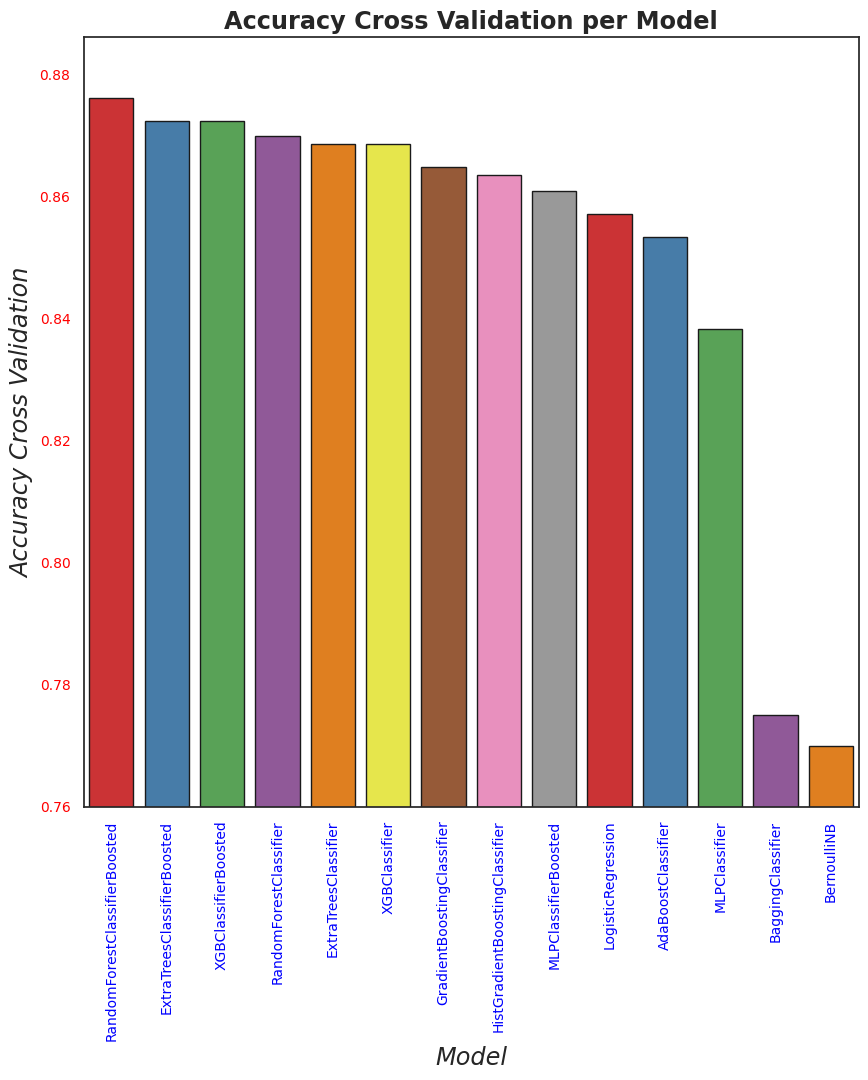

In [ ]:
sns.set(style="white",rc={'figure.figsize':(10, 10)})
axis = sns.barplot(dfResult_classification['Model'],dfResult_classification['Accuracy Cross Validation'],palette = 'Set1',edgecolor = 'k')
plt.title("Accuracy Cross Validation per Model", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Model", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Accuracy Cross Validation", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.ylim(min(dfResult_classification['Accuracy Cross Validation'])-0.01,max(dfResult_classification['Accuracy Cross Validation'])+0.01)
plt.show()